Michael Encinas Project 1

1. (Using global) Using the data provided find the global trends over the years for 3 religions, and
plot a comparative graph displaying the number of followers per year. 

In [139]:
library(tidyverse)


In [141]:
global_data <- read_csv("global.csv", show_col_types = FALSE)


In [147]:
selected_global_data <- global_data %>%
  select(year, christianity_all, judaism_all, islam_all)


In [149]:
print(selected_global_data)

# A tibble: 14 × 4
    year christianity_all judaism_all  islam_all
   <dbl>            <dbl>       <dbl>      <dbl>
 1  1945        701350290    12009400  130760281
 2  1950        696480122    13698294  294121067
 3  1955        836002102    12986204  344072007
 4  1960        966967595    13728856  435123088
 5  1965       1074713786    14253679  514634057
 6  1970       1176605676    14833409  592342288
 7  1975       1300116609    15914548  663674348
 8  1980       1392078609    16606995  647139477
 9  1985       1506919051    16782995  747128591
10  1990       1695081219    14869547  999680318
11  1995       1785414969    14072306 1154990606
12  2000       1890923184    13446312 1314048240
13  2005       1990731467    14270328 1426454346
14  2010       2111912953    14023309 1555482766


In [151]:
transformed_global_data <- selected_global_data %>%
  pivot_longer(cols = c(christianity_all, judaism_all, islam_all),
               names_to = "Religion",
               values_to = "Followers")


In [153]:
print(transformed_global_data)



# A tibble: 42 × 3
    year Religion         Followers
   <dbl> <chr>                <dbl>
 1  1945 christianity_all 701350290
 2  1945 judaism_all       12009400
 3  1945 islam_all        130760281
 4  1950 christianity_all 696480122
 5  1950 judaism_all       13698294
 6  1950 islam_all        294121067
 7  1955 christianity_all 836002102
 8  1955 judaism_all       12986204
 9  1955 islam_all        344072007
10  1960 christianity_all 966967595
# ℹ 32 more rows


In [155]:
library(scales)

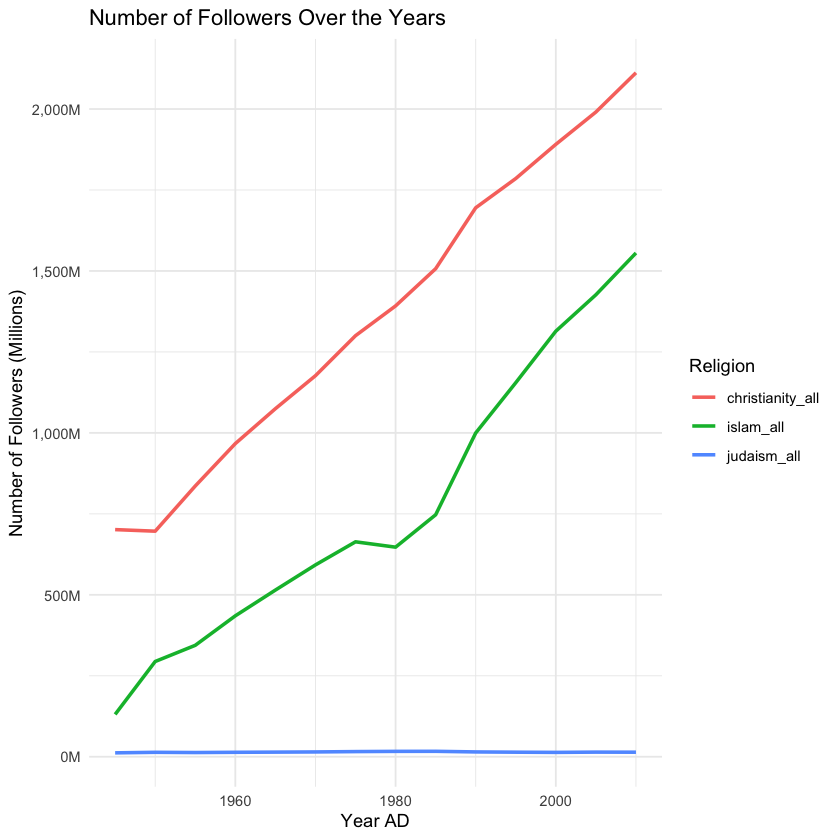

In [161]:
# Create the plot with number formatting
ggplot(transformed_global_data, aes(x = year, y = Followers, color = Religion)) +
  geom_line(size = 1) +
  scale_y_continuous(labels = scales::number_format(scale = 1e-6, suffix = "M", big.mark = ",")) +  # This is to format numbers in millions
  labs(title = "Number of Followers Over the Years",
       x = "Year AD",
       y = "Number of Followers (Millions)",
       color = "Religion") +
  theme_minimal()


2. (Using national) Find the proportion of religions in a country you select for the years 1945, 1980, and 2010 and generate a graph with these proportions.


In [163]:
national_data <- read_csv("national.csv", show_col_types = FALSE)


In [165]:
selected_national_columns <- national_data %>%
  select(year, state , buddhism_all, zoroastrianism_all, hinduism_all, sikhism_all,
         shinto_all, `baha’i_all`, taoism_all, jainism_all, confucianism_all, 
         syncretism_all, animism_all, noreligion_all, otherreligion_all,
         christianity_all, islam_all, judaism_all)


In [167]:
usa_dataset <- selected_national_columns %>%
  filter(state == "United States of America")



In [169]:
print(usa_dataset)

# A tibble: 14 × 18
    year state          buddhism_all zoroastrianism_all hinduism_all sikhism_all
   <dbl> <chr>                 <dbl>              <dbl>        <dbl>       <dbl>
 1  1945 United States…      1601218                  0            0           0
 2  1950 United States…            0                  0            0           0
 3  1955 United States…        90173                  0            0           0
 4  1960 United States…      2012131                  0            0           0
 5  1965 United States…      1080892                  0            0           0
 6  1970 United States…      1113861                  0            0           0
 7  1975 United States…      1019556                  0       159778        1597
 8  1980 United States…      1357967                  0       995149           0
 9  1985 United States…      1984325                  0      1005000           0
10  1990 United States…      1575481              52301       323352       18517
11  1995

In [171]:
usa_selected_years <- usa_dataset %>%
  filter(year %in% c(1945, 1980, 2010))


In [173]:
usa_proportions <- usa_selected_years %>%
  pivot_longer(cols = -c(year, state),
               names_to = "Religion",
               values_to = "Followers") %>%
  group_by(year) %>%
  mutate(total_followers = sum(Followers, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(proportion = Followers / total_followers)


In [175]:
print(usa_proportions)

# A tibble: 48 × 6
    year state                    Religion  Followers total_followers proportion
   <dbl> <chr>                    <chr>         <dbl>           <dbl>      <dbl>
 1  1945 United States of America buddhism…   1601218       139928000     0.0114
 2  1945 United States of America zoroastr…         0       139928000     0     
 3  1945 United States of America hinduism…         0       139928000     0     
 4  1945 United States of America sikhism_…         0       139928000     0     
 5  1945 United States of America shinto_a…         0       139928000     0     
 6  1945 United States of America baha’i_a…         0       139928000     0     
 7  1945 United States of America taoism_a…         0       139928000     0     
 8  1945 United States of America jainism_…         0       139928000     0     
 9  1945 United States of America confucia…         0       139928000     0     
10  1945 United States of America syncreti…         0       139928000     0     
# ℹ 38 mo

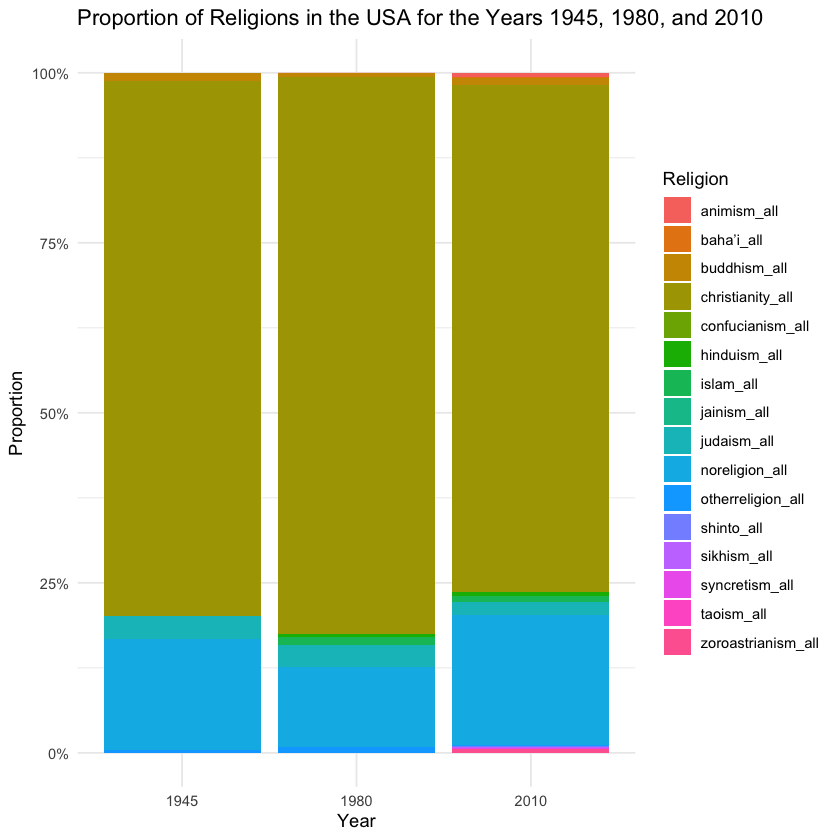

In [71]:
ggplot(usa_proportions, aes(x = factor(year), y = proportion, fill = Religion)) +
  geom_bar(stat = "identity", position = "fill") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(title = "Proportion of Religions in the USA for the Years 1945, 1980, and 2010",
       x = "Year",
       y = "Proportion",
       fill = "Religion") +
  theme_minimal()

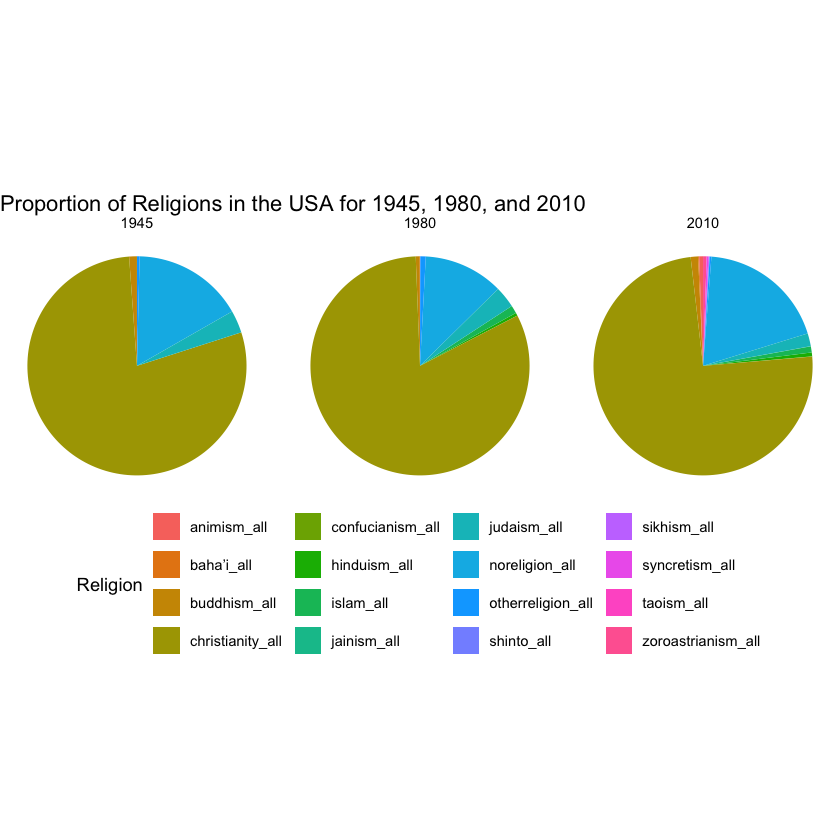

In [179]:
# Generate pie charts
pie_chart_USA <- ggplot(usa_proportions, aes(x = "", y = proportion, fill = Religion)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  facet_wrap(~ year) +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(title = "Proportion of Religions in the USA for 1945, 1980, and 2010",
       x = NULL,
       y = NULL,
       fill = "Religion") +
  theme_void() +
  theme(legend.position = "bottom")

print(pie_chart_USA)

3. (Using regional) Find the descriptive statistics for 3 religions, grouping by year and then grouping by region.

In [181]:
regional_data <- read_csv("regional.csv", show_col_types = FALSE)


In [185]:
selected_religions_from_regional <- regional_data %>%
  select(year, region, christianity_all, islam_all, judaism_all)


In [191]:
descriptive_stats_year <- selected_religions_from_regional %>%
  pivot_longer(cols = c(christianity_all, islam_all, judaism_all),
               names_to = "Religion",
               values_to = "Followers") %>%
  group_by(year, Religion) %>%
  summarise(
    mean = mean(Followers, na.rm = TRUE),
    median = median(Followers, na.rm = TRUE),
    sd = sd(Followers, na.rm = TRUE),
    min = min(Followers, na.rm = TRUE),
    max = max(Followers, na.rm = TRUE),
    .groups = "drop" 
  ) %>%
  arrange(year, Religion)


In [193]:
print(descriptive_stats_year)


# A tibble: 42 × 7
    year Religion               mean   median         sd     min       max
   <dbl> <chr>                 <dbl>    <dbl>      <dbl>   <dbl>     <dbl>
 1  1945 christianity_all 140270058  14588060 188797387. 4011695 420908000
 2  1945 islam_all         26152056. 29353397  24462821.       0  60095064
 3  1945 judaism_all        2401880    623240   2978564.   30369   6068020
 4  1950 christianity_all 139296024. 45163397 162472104. 5113854 347718164
 5  1950 islam_all         58824213. 30109208  77803326.   20770 189121761
 6  1950 judaism_all        2739659.  1630211   3037875.   54754   6580257
 7  1955 christianity_all 167200420. 58967413 197237480. 5654101 441172436
 8  1955 islam_all         68814401. 33390170  87614490.    2730 210722747
 9  1955 judaism_all        2597241.  1966399   2683901.   81070   5642323
10  1960 christianity_all 193393519  74184616 204561405. 5473940 458326158
# ℹ 32 more rows


In [195]:

# Calculate descriptive statistics grouped by region
descriptive_stats_region <- selected_religions %>%
  pivot_longer(cols = c(christianity_all, islam_all, judaism_all),
               names_to = "Religion",
               values_to = "Followers") %>%
  group_by(region, Religion) %>%
  summarise(
    mean = mean(Followers, na.rm = TRUE),
    median = median(Followers, na.rm = TRUE),
    sd = sd(Followers, na.rm = TRUE),
    min = min(Followers, na.rm = TRUE),
    max = max(Followers, na.rm = TRUE),
    .groups = "drop"  # Drop the grouping structure after summarizing
  ) %>%
  arrange(region, Religion)


In [197]:
print(descriptive_stats_region)

# A tibble: 15 × 7
   region    Religion               mean     median         sd       min     max
   <chr>     <chr>                 <dbl>      <dbl>      <dbl>     <dbl>   <dbl>
 1 Africa    christianity_all 191221045. 171161323  146980196.  14588060  4.60e8
 2 Africa    islam_all        102318147.  88280764.  79120151.   5051475  2.46e8
 3 Africa    judaism_all         132852.    130177      34412.     80487  2.04e5
 4 Asia      christianity_all 153193543  145394958.  94137573.   9919091  2.88e8
 5 Asia      islam_all        398735019. 315862442. 234184180.  36260345  8.05e8
 6 Asia      judaism_all         104102.     98450      43330.     30369  1.95e5
 7 Europe    christianity_all 490476046. 494642820.  61059242. 347718164  5.71e8
 8 Europe    islam_all         40066549.  40007730.   6912387.  29353397  5.12e7
 9 Europe    judaism_all        4109000    4619075    1431460.   1378063  6.07e6
10 Mideast   christianity_all  10863776.   9533400    5612755.   4011695  1.98e7
11 Mideas

In [199]:
mystats <- function(x, na.omit = FALSE) {
  if (na.omit)
    x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x - m)^3 / s^3) / n
  kurt <- sum((x - m)^4 / s^4) / n - 3
  return(c(n = n, mean = m, stdev = s, skew = skew, kurtosis = kurt))
}

In [201]:
regional_data <- read_csv("regional.csv", show_col_types = FALSE)


In [203]:
selected_religions <- regional_data %>%
  select(year, region, christianity_all, islam_all, judaism_all)



In [205]:
descriptive_stats_year <- selected_religions %>%
  pivot_longer(cols = c(christianity_all, islam_all, judaism_all),
               names_to = "Religion",
               values_to = "Followers") %>%
  group_by(year, Religion) %>%
  reframe(n = n(),
          mean = mean(Followers, na.rm = TRUE),
          stdev = sd(Followers, na.rm = TRUE),
          skew = sum((Followers - mean(Followers, na.rm = TRUE))^3 / sd(Followers, na.rm = TRUE)^3) / n(),
          kurtosis = sum((Followers - mean(Followers, na.rm = TRUE))^4 / sd(Followers, na.rm = TRUE)^4) / n() - 3) %>%
  arrange(year, Religion)


In [207]:
print(descriptive_stats_year)

# A tibble: 42 × 7
    year Religion             n       mean      stdev  skew kurtosis
   <dbl> <chr>            <int>      <dbl>      <dbl> <dbl>    <dbl>
 1  1945 christianity_all     5 140270058  188797387. 0.498    -1.86
 2  1945 islam_all            5  26152056.  24462821. 0.176    -1.88
 3  1945 judaism_all          5   2401880    2978564. 0.302    -2.20
 4  1950 christianity_all     5 139296024. 162472104. 0.320    -2.16
 5  1950 islam_all            5  58824213.  77803326. 0.779    -1.31
 6  1950 judaism_all          5   2739659.   3037875. 0.250    -2.14
 7  1955 christianity_all     5 167200420. 197237480. 0.386    -2.03
 8  1955 islam_all            5  68814401.  87614490. 0.671    -1.49
 9  1955 judaism_all          5   2597241.   2683901. 0.145    -2.20
10  1960 christianity_all     5 193393519  204561405. 0.309    -2.13
# ℹ 32 more rows


In [209]:
descriptive_stats_region <- selected_religions %>%
  pivot_longer(cols = c(christianity_all, islam_all, judaism_all),
               names_to = "Religion",
               values_to = "Followers") %>%
  group_by(region, Religion) %>%
  reframe(n = n(),
          mean = mean(Followers, na.rm = TRUE),
          stdev = sd(Followers, na.rm = TRUE),
          skew = sum((Followers - mean(Followers, na.rm = TRUE))^3 / sd(Followers, na.rm = TRUE)^3) / n(),
          kurtosis = sum((Followers - mean(Followers, na.rm = TRUE))^4 / sd(Followers, na.rm = TRUE)^4) / n() - 3) %>%
  arrange(region, Religion)


In [211]:
print(descriptive_stats_region)

# A tibble: 15 × 7
   region    Religion             n       mean      stdev     skew kurtosis
   <chr>     <chr>            <int>      <dbl>      <dbl>    <dbl>    <dbl>
 1 Africa    christianity_all    14 191221045. 146980196.  0.321     -1.33 
 2 Africa    islam_all           14 102318147.  79120151.  0.316     -1.30 
 3 Africa    judaism_all         14    132852.     34412.  0.407     -0.899
 4 Asia      christianity_all    14 153193543   94137573.  0.0822    -1.62 
 5 Asia      islam_all           14 398735019. 234184180.  0.417     -1.25 
 6 Asia      judaism_all         14    104102.     43330.  0.384     -0.603
 7 Europe    christianity_all    14 490476046.  61059242. -0.643     -0.216
 8 Europe    islam_all           14  40066549.   6912387.  0.138     -1.12 
 9 Europe    judaism_all         14   4109000    1431460. -0.620     -1.14 
10 Mideast   christianity_all    14  10863776.   5612755.  0.291     -1.69 
11 Mideast   islam_all           14 229858551. 129683764.  0.239     

4. Data Validation: Confirm that the number of people per year, per country, corresponds to the number of people in the global dataset.

In [270]:
global_data <- read_csv("global.csv", show_col_types = FALSE)
national_data <- read_csv("national.csv", show_col_types = FALSE)


In [272]:
religion_columns <- c("christianity_all", "islam_all", "hinduism_all", "buddhism_all",
                      "zoroastrianism_all", "sikhism_all", "shinto_all", "baha’i_all",
                      "taoism_all", "jainism_all", "confucianism_all", "syncretism_all",
                      "animism_all", "noreligion_all", "otherreligion_all", "judaism_all")


In [274]:
national_summary <- national_data %>%
  select(year, all_of(religion_columns)) %>%
  group_by(year) %>%
  summarise(across(everything(), ~sum(.x, na.rm = TRUE)), .groups = "drop")


In [276]:
national_long <- national_summary %>%
  pivot_longer(cols = all_of(religion_columns),
               names_to = "Religion",
               values_to = "Followers_national")


In [278]:
global_long <- global_data %>%
  select(year, all_of(religion_columns)) %>%
  pivot_longer(cols = all_of(religion_columns),
               names_to = "Religion",
               values_to = "Followers_global")


In [280]:
comparison <- national_long %>%
  left_join(global_long, by = c("year", "Religion"))


In [282]:
comparison_year <- comparison %>%
  mutate(match = ifelse(Followers_national == Followers_global, TRUE, FALSE))



In [284]:
print(comparison_year)

# A tibble: 224 × 5
    year Religion           Followers_national Followers_global match
   <dbl> <chr>                           <dbl>            <dbl> <lgl>
 1  1945 christianity_all            701350290        701350290 TRUE 
 2  1945 islam_all                   130760281        130760281 TRUE 
 3  1945 hinduism_all                  5389197          5389197 TRUE 
 4  1945 buddhism_all                116237936        116237936 TRUE 
 5  1945 zoroastrianism_all              12710            12710 TRUE 
 6  1945 sikhism_all                     20809            20809 TRUE 
 7  1945 shinto_all                   55228775         55228775 TRUE 
 8  1945 baha’i_all                      15495            15495 TRUE 
 9  1945 taoism_all                     120950           120950 TRUE 
10  1945 jainism_all                       181              181 TRUE 
# ℹ 214 more rows


In [286]:
mismatches_followers <- comparison_year %>%
  filter(!match)
print(mismatches_followers)

# A tibble: 4 × 5
   year Religion         Followers_national Followers_global match
  <dbl> <chr>                         <dbl>            <dbl> <lgl>
1  2000 christianity_all         1890923183       1890923184 FALSE
2  2005 christianity_all         1990731466       1990731467 FALSE
3  2010 islam_all                1555482763       1555482766 FALSE
4  2010 animism_all               174264338        174264339 FALSE


5. Data Validation: Confirm that the number of people per year, per region, corresponds to the number of people in the global dataset.

In [289]:
global_data <- read_csv("global.csv", show_col_types = FALSE)
regional_data <- read_csv("regional.csv", show_col_types = FALSE)


In [291]:
religion_columns <- c("christianity_all", "islam_all", "hinduism_all", "buddhism_all",
                      "zoroastrianism_all", "sikhism_all", "shinto_all", "baha’i_all",
                      "taoism_all", "jainism_all", "confucianism_all", "syncretism_all",
                      "animism_all", "noreligion_all", "otherreligion_all", "judaism_all")


In [293]:
regional_summary_by_year <- regional_summary %>%
  group_by(year) %>%
  summarise(across(starts_with("christianity_all"):starts_with("judaism_all"), sum), .groups = "drop")


In [295]:
regional_long <- regional_summary_by_year %>%
  pivot_longer(cols = all_of(religion_columns),
               names_to = "Religion",
               values_to = "Followers_regional")

In [297]:
global_long <- global_data %>%
  select(year, all_of(religion_columns)) %>%
  pivot_longer(cols = all_of(religion_columns),
               names_to = "Religion",
               values_to = "Followers_global")

In [299]:
comparison <- regional_long %>%
  left_join(global_long, by = c("year", "Religion"))


In [301]:
comparison <- comparison %>%
  mutate(match = ifelse(Followers_regional == Followers_global, TRUE, FALSE))


In [303]:
print(comparison)

# A tibble: 224 × 5
    year Religion           Followers_regional Followers_global match
   <dbl> <chr>                           <dbl>            <dbl> <lgl>
 1  1945 christianity_all            701350290        701350290 TRUE 
 2  1945 islam_all                   130760281        130760281 TRUE 
 3  1945 hinduism_all                  5389197          5389197 TRUE 
 4  1945 buddhism_all                116237936        116237936 TRUE 
 5  1945 zoroastrianism_all              12710            12710 TRUE 
 6  1945 sikhism_all                     20809            20809 TRUE 
 7  1945 shinto_all                   55228775         55228775 TRUE 
 8  1945 baha’i_all                      15495            15495 TRUE 
 9  1945 taoism_all                     120950           120950 TRUE 
10  1945 jainism_all                       181              181 TRUE 
# ℹ 214 more rows


In [305]:
mismatches <- comparison %>%
  filter(!match)
print(mismatches)

# A tibble: 1 × 5
   year Religion          Followers_regional Followers_global match
  <dbl> <chr>                          <dbl>            <dbl> <lgl>
1  2010 otherreligion_all           26572932         26572933 FALSE
